In [1]:
import random as rd
import numpy as np

## Area estimation example: using Monte Carlo / probabilistic elements to estimate a deterministic quantity.

In [2]:
def bell(x):  # function height for reference
    return (1/np.sqrt(2*np.pi))*np.exp(-0.5*x**2)

In [3]:
N = 10000  # number of points generated (law of large numbers!)
inside = 0  # initialize a tally

for i in range(N):
    # randomly generated point (x,y)
    x = rd.uniform(-1,1)
    y = rd.uniform(0,1)
    
    if y <= bell(x):  # is the y value below the curve at that x location?
        inside = inside + 1
    
print(inside)
print(inside/N)
print((inside/N)*2)  # desired area

3401
0.3401
0.6802


### probability that we are within 1 standard deviation of the mean on a bell curve: 68.5% by empirical rule

## Shop example below, using Monte Carlo / probabilistic elements for things that inherently have variability (customer arrivals and how long they need to be helped).

In [4]:
N = 15 # customers
days = 365 # total days to simulate

avgwaitperday = np.zeros((days,1))

In [5]:
for day in range(days):  # each day
    
    lastarrival = 0 # start the day
    
    # arrival time, wait time, start time, duration, end time
    store = np.zeros((N,5))
    
    for customer in range(N): # each customer
        
        gap = rd.expovariate(1/40) # avg time between arrivals is 40 min

        arrival = lastarrival + gap  # this customer arrives at...
        store[customer,0] = arrival

        lastarrival = arrival  # reference point for the next customer's arrival

        # when this customer is helped by a shop worker
        if customer < 1:
            start = arrival  # if first customer (index 0) then right away
        else:
            if arrival > store[customer-1,4]: 
                start = arrival # if this customer arrives after previous leaves, then the worker is available right away
            else:
                start = store[customer-1,4] # this customer arrives, but the worker is still helping the previous customer.
            
            # shorter option to replace this if/else combo: start = max(arrival, store[customer-1,4]) 

        store[customer,2] = start
        store[customer,1] = start - arrival # wait time

        # randomized duration and corresponding end time
        duration = rd.normalvariate(30,10)

        store[customer,3] = duration
        store[customer,4] = start + duration # this customer is done, end time

    # print(store)
    avgwait = sum(store[:,1])/N  # average of the customer wait times on this day
    avgwaitperday[day,0] = avgwait

avgavg = sum(avgwaitperday[:,0])/days
print(avgavg)  # over our FULL simulation, the average wait time experienced per customer

26.746229578471006


## Dynamics example below, using Monte Carlo / probabilistic elements for uncertainty in our parameter estimations.

In [6]:
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [7]:
N = 10
tspan = [0,30]
y0 = [100]

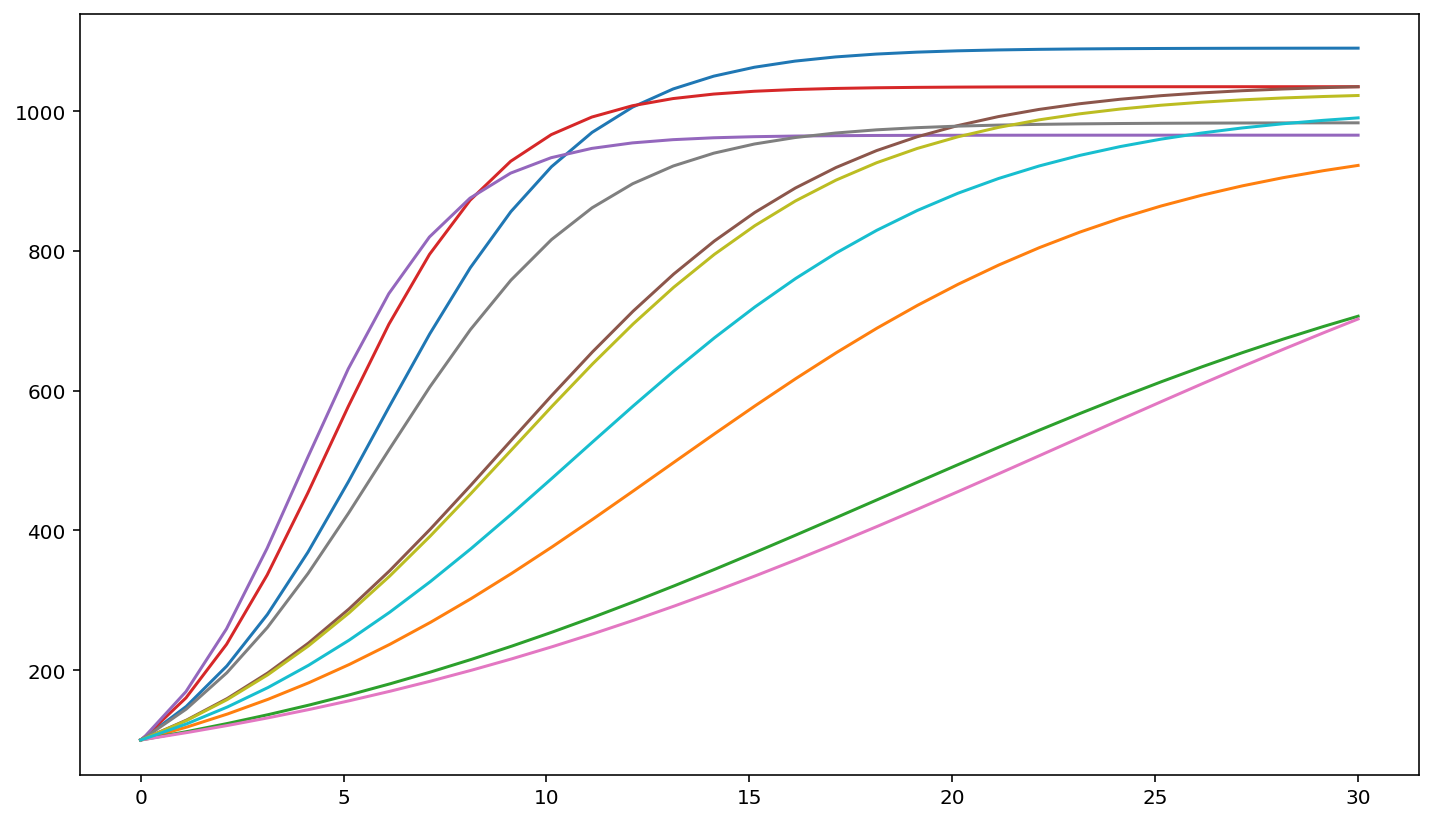

In [8]:
for i in range(N):
    ri = rd.normalvariate(0.3,0.1)
    Mi = rd.normalvariate(1000,50)
    
    def dydt(t,y):
        return ri*y*(1-y/Mi)
    
    sol = solve_ivp(dydt,tspan,y0,max_step=1)
    
    plt.plot(sol.t,sol.y.T)